In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data preprocessing

In [52]:
df=pd.read_csv("IMDb Movies India.csv",encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [54]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [55]:
df.dropna(inplace=True)

In [56]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [57]:
df.shape

(5659, 10)

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [61]:
df['Year']=df['Year'].str.replace(r'[()]','',regex=True).str.strip().astype(int)

In [62]:
df['Duration']=pd.to_numeric(df['Duration'].str.replace('min',''))

In [63]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [64]:
df['Votes']=pd.to_numeric(df['Votes'].str.replace(',',''))

### Visualization

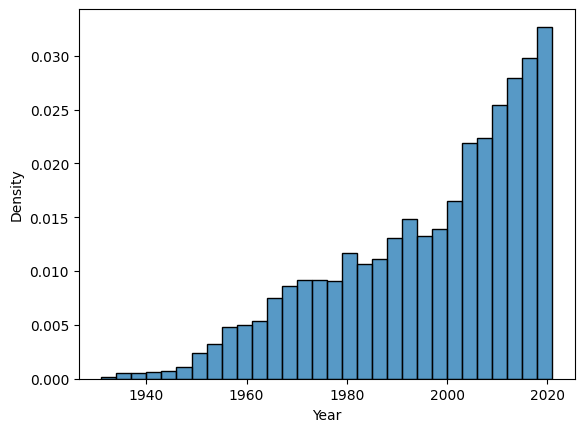

In [102]:
#*. year with probability density

sns.histplot(x=df['Year'],data=df,bins=30,stat='density')
plt.show()

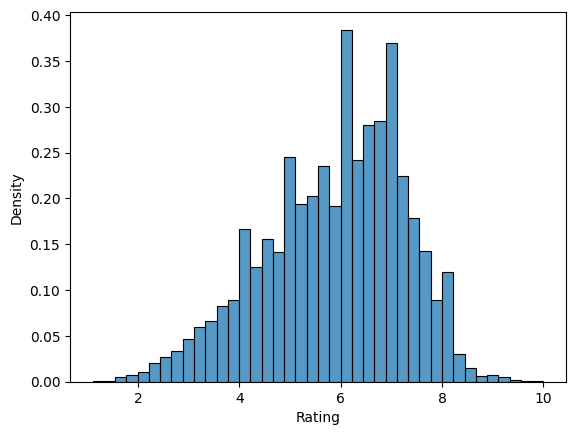

In [105]:
#*. Rating  with probability density

sns.histplot(x=df['Rating'],data=df,bins=40,stat='density')
plt.show()

#### observations:
        1.max ratigs are situated in between the 4 to 8.

In [65]:
# 1.Years with Best Rating:

avg_yr_rat=df.groupby('Year')['Rating'].agg(['mean','count'])
avg_yr_rat
filtered=avg_yr_rat[avg_yr_rat['count']>=5]
filtered
best_rating=filtered.sort_values(by='mean',ascending=False)
mean=best_rating.head(10)['mean']
mean
years=best_rating.head(10).index


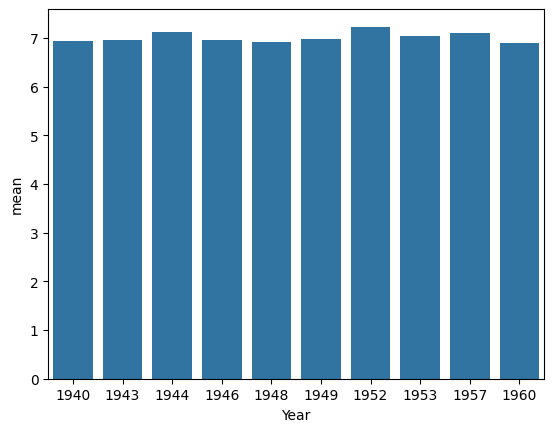

In [66]:
sns.barplot(x=years,y=mean)
plt.show()

#### observations:
        1.These are the Top 10 best years with avg_rating.
        2.1948 and 1950 has the top avg_rating of 7+.

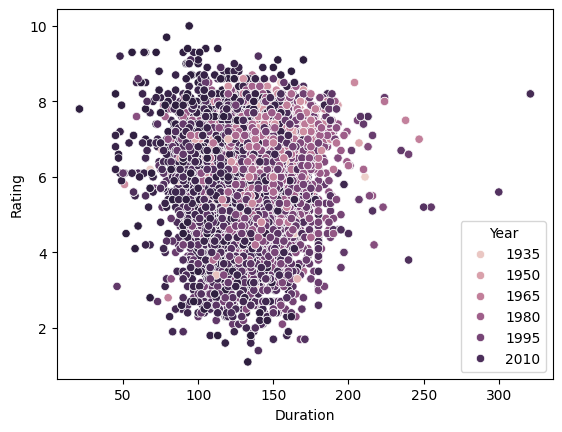

In [67]:
# 2. Does length of the movie impact the rating.
sns.scatterplot(x=df['Duration'],y=df['Rating'],hue=df['Year'])
plt.show()

#### observations:
            1. It seems that duration will not affect the rating.
            2. Even 50 min will have low rating and 150 min have low rating.and both have high rating also, 
                this concludes that rating wouldn't effect with duration.
            3. It only based on storyLine , acting, and cinematography.
            4. if you observe there is totally 4 outliers. but i am ignoring it just 1 on left and 3 on right. it okay to leave them as of now.

In [68]:
# Top 10 movies according to the rating per year and overall.
mov_rat_grp=df.groupby('Name')['Rating'].agg(['mean','count'])
best_mov=mov_rat_grp.sort_values(by="mean",ascending=False)
Top10_overall=best_mov.head(10)
Top10_overall

,mean,count
Name,,
Love Qubool Hai,10.0,2
Half Songs,9.7,2
June,9.4,1
Gho Gho Rani,9.4,2
The Reluctant Crime,9.4,1
Secrets of Sinauli,9.3,2
Refl3ct,9.3,1
God of gods,9.3,1
Ashok Vatika,9.3,1


In [69]:
Top10_overall.reset_index(inplace=True)

In [70]:
Top10_overall

,Name,mean,count
0,Love Qubool Hai,10.0,2
1,Half Songs,9.7,2
2,June,9.4,1
3,Gho Gho Rani,9.4,2
4,The Reluctant Crime,9.4,1
5,Secrets of Sinauli,9.3,2
6,Refl3ct,9.3,1
7,God of gods,9.3,1
8,Ashok Vatika,9.3,1
9,Sindhustan,9.3,3


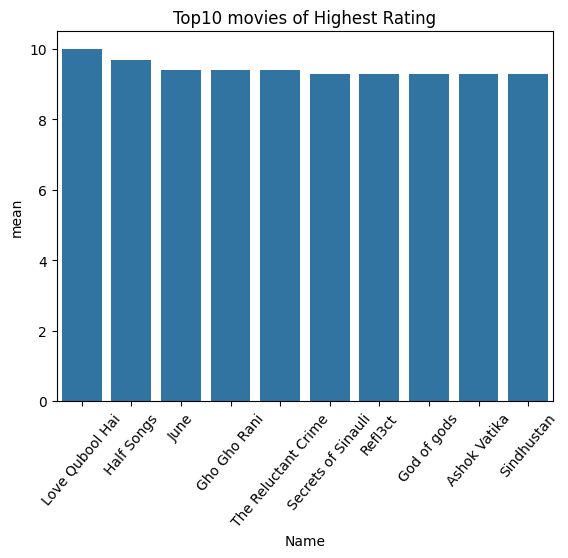

In [71]:
names=Top10_overall['Name']
mean=Top10_overall['mean']

sns.barplot(x=names,y=mean,orient="v")
plt.xticks(rotation=50)
plt.title("Top10 movies of Highest Rating")

plt.show()

#### observations:
            1.Love qubool hai, is the top movie with highest rating.
            2.ashok vatika is 10th place.
            3.top 10 movies rating are above 9+ which means these are good movies.

In [72]:
# top5 movies in 2021
top=df.sort_values(['Year','Rating'],ascending=[True,False]).groupby('Year').get_group(2021).head(10)
top


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5410,Half Songs,2021,79,Music,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
5410,Half Songs,2021,79,Romance,9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
8344,Love Sorries,2021,101,Comedy,9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
8344,Love Sorries,2021,101,Drama,9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
8344,Love Sorries,2021,101,Romance,9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar
12673,Secrets of Sinauli,2021,56,Documentary,9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
12673,Secrets of Sinauli,2021,56,History,9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit


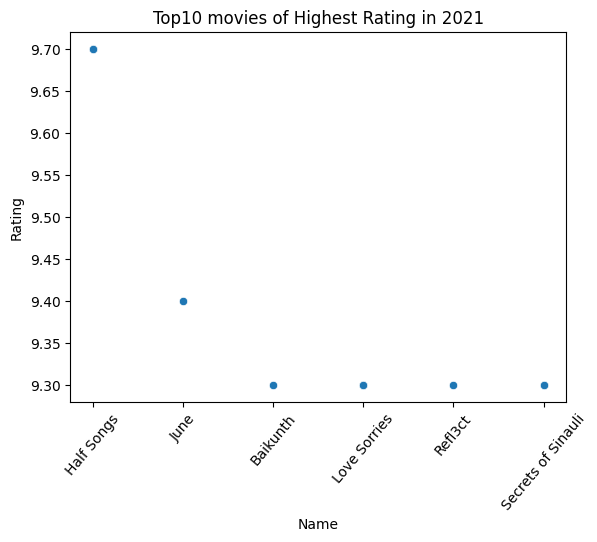

In [73]:
sns.scatterplot(x=top.Name,y=top.Rating,data=top)
plt.xticks(rotation=50)
plt.title("Top10 movies of Highest Rating in 2021")

plt.show()

#### observations:
        1. top movie in 2021 is 'Half songs'
        2. Most of the movies in 2021 got around 9.3 rating.

In [74]:
# Top 10 lowest rating movies
mov_rat_grp=df.groupby('Name')['Rating'].agg(['mean','count'])
best_mov=mov_rat_grp.sort_values(by="mean",ascending=True)
Top10_overall=best_mov.head(10)
Top10_overall.reset_index(inplace=True)

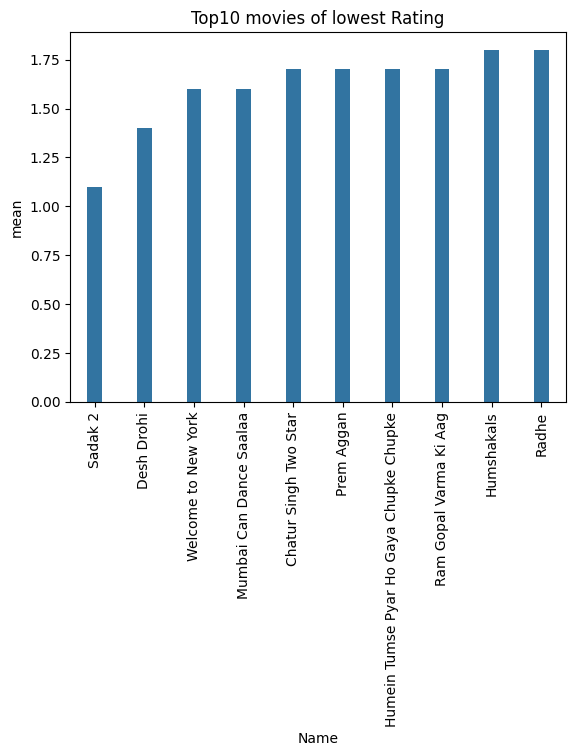

In [75]:
names=Top10_overall['Name']
mean=Top10_overall['mean']

sns.barplot(x=names,y=mean,orient="v",width=0.3)
plt.xticks(rotation=90)
plt.title("Top10 movies of lowest Rating")

plt.show()

#### observations:
            1. sadak 2 movie got lowest rating.
            2. top 10 lowest movies rating is around the 1.2 to 1.6

### Model Development

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [77]:
df.drop('Name',axis=1,inplace=True)

In [82]:
genre_mean_rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating']=genre_mean_rating

director_mean_rating=df.groupby('Director')['Rating'].transform('mean')
df['director_encode']=director_mean_rating

actor1_mean_rating=df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_encode']=actor1_mean_rating

actor2_mean_rating=df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2_encode']=actor2_mean_rating

actor3_mean_rating=df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3_encode']=actor3_mean_rating

In [83]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,director_encode,actor1_encode,actor2_encode,actor3_encode,movie_age
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.056744,7.000000,6.850000,7.00,7.00,6
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.751042,4.400000,5.250000,4.40,4.46,6
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.811087,4.400000,5.250000,4.40,4.46,6
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.751042,5.335135,4.793617,5.73,5.93,28
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.056744,5.335135,4.793617,5.73,5.93,28


In [84]:
df['movie_age'] = 2025 - df['Year']


In [85]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,director_encode,actor1_encode,actor2_encode,actor3_encode,movie_age
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.056744,7.000000,6.850000,7.00,7.00,6
3,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.751042,4.400000,5.250000,4.40,4.46,6
3,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.811087,4.400000,5.250000,4.40,4.46,6
5,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.751042,5.335135,4.793617,5.73,5.93,28
5,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.056744,5.335135,4.793617,5.73,5.93,28


In [87]:
X=df[['Duration','Votes','movie_age','Genre_mean_rating','director_encode','actor1_encode','actor2_encode','actor3_encode']]
X

,Duration,Votes,movie_age,Genre_mean_rating,director_encode,actor1_encode,actor2_encode,actor3_encode
1,109,8,6,6.056744,7.000000,6.850000,7.000000,7.000000
3,110,35,6,5.751042,4.400000,5.250000,4.400000,4.460000
3,110,35,6,5.811087,4.400000,5.250000,4.400000,4.460000
5,147,827,28,5.751042,5.335135,4.793617,5.730000,5.930000
5,147,827,28,6.056744,5.335135,4.793617,5.730000,5.930000
...,...,...,...,...,...,...,...,...
15503,125,44,36,6.056744,6.290476,6.377419,5.800000,6.018750
15505,129,655,26,5.520463,5.175000,5.440845,4.603704,5.754545
15505,129,655,26,6.056744,5.175000,5.440845,4.603704,5.754545
15508,130,20,27,5.520463,4.090625,6.045128,5.632558,5.780000


In [88]:
y=df['Rating']
y

1        7.0
3        4.4
3        4.4
5        4.7
5        4.7
        ... 
15503    5.8
15505    4.5
15505    4.5
15508    6.2
15508    6.2
Name: Rating, Length: 11979, dtype: float64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [90]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred=lr.predict(X_test)
y_pred

array([3.94886873, 6.00222825, 7.0063588 , ..., 5.99468308, 4.66740644,
       6.51074661])

In [107]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.45
MAE: 0.49
R² Score: 0.76


### Model Testing

In [111]:
data={'Duration':[145],'Votes':[156],'movie_age':[35],'Genre_mean_rating':[7],'director_encode':[6.8],'actor1_encode':[6.7],'actor2_encode':[7],'actor3_encode':[6]}
trail=pd.DataFrame(data)
trail


,Duration,Votes,movie_age,Genre_mean_rating,director_encode,actor1_encode,actor2_encode,actor3_encode
0,145,156,35,7,6.8,6.7,7,6


In [122]:
result=lr.predict(trail)
result.tolist()

[6.851239997832363]